# Digit Recognition using kNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
digits_train = pd.read_csv('train.csv')

In [3]:
digits_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digits_train.isnull().any().sum()

0

In [5]:
digits_train.drop(['label'], axis = 1, inplace = True)

In [6]:
X_train = digits_train.values

In [7]:
X_train.shape

(42000, 784)

In [8]:
y_train = digits_train.iloc[:,0]

In [9]:
y_train.shape

(42000,)

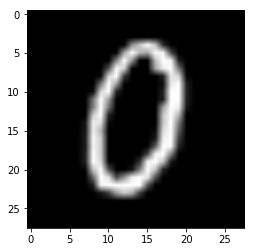

In [10]:
plt.imshow(X_train[5].reshape(28,28), interpolation='bilinear', cmap='gray');

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
knn = KNeighborsClassifier(n_neighbors=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
predicted = knn.predict(X_test)

In [17]:
np.mean(predicted==y_test)

1.0

In [18]:
digits_test = pd.read_csv('test.csv')

In [19]:
digits_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
predicted = knn.predict(digits_test)

In [21]:
index = np.arange(1,28001)
submission = pd.Series(predicted, index = index, name = 'Label')

In [22]:
submission.to_csv("submission.csv",header=True , index_label='ImageId')